In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
import xgboost as xgb



In [3]:
df = pd.read_excel('used cars.xlsx')

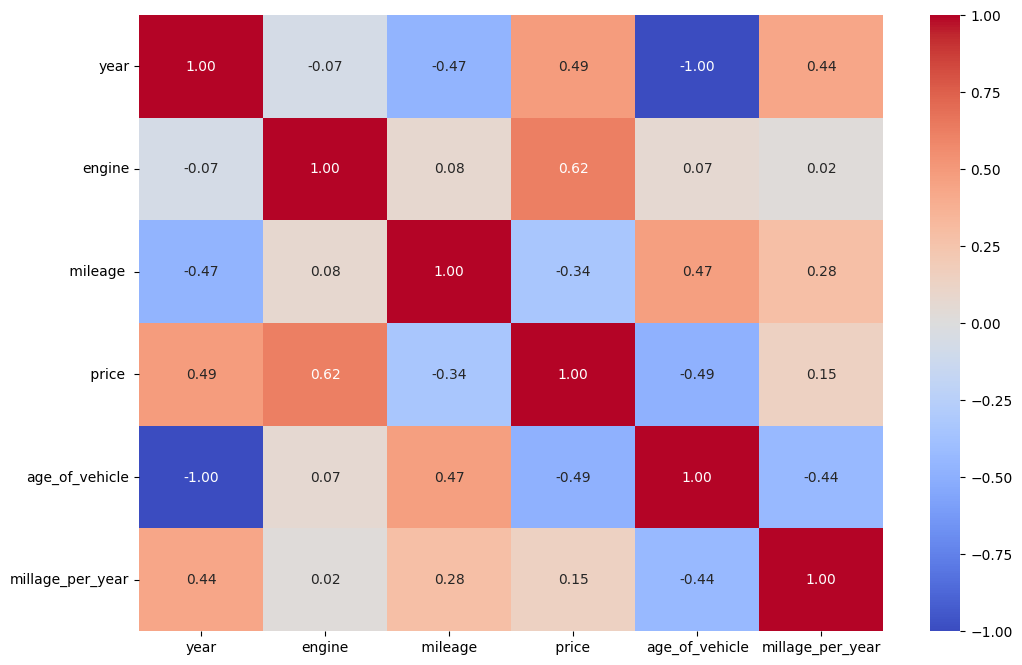

In [4]:
## Feature Selection
correlation_matrix = df.select_dtypes(include='number').corr()

# Visualize the correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()




In [5]:
# Drop features that are highly correlated (threshold can be adjusted)

threshold = 0.8
corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            corr_features.add(colname)

df.drop(corr_features, axis=1, inplace=True)

In [6]:
df.dtypes

city                    object
make                    object
model                   object
year                     int64
engine                   int64
transmission            object
fuel                    object
color                   object
registered              object
registration status     object
 mileage               float64
 price                   int64
millage_per_year       float64
dtype: object

In [6]:
## encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['city'] = le.fit_transform(df[['city']])
df['make'] = le.fit_transform(df[['make']])


df['transmission'] = le.fit_transform(df[['transmission']])
df['registered'] = le.fit_transform(df[['registered']])
df['registration status'] = le.fit_transform(df[['registration status']])
df['fuel'] = le.fit_transform(df[['fuel']])
df['color'] = le.fit_transform(df[['color']])
df['model'] = df['model'].astype(str)
df['model'] = le.fit_transform(df[['model']])


In [8]:
df

,city,make,model,year,engine,transmission,fuel,color,registered,registration status,mileage,price,millage_per_year
0,211,59,117,2013,1300,1,2,307,62,0,145000.0,2870000,14500.000000
1,160,26,105,2000,1300,1,2,43,62,0,230000.0,995000,10000.000000
2,160,59,407,2021,1300,1,2,335,91,0,60500.0,3585000,30250.000000
3,160,58,353,2017,1300,1,2,163,45,0,87000.0,2250000,14500.000000
4,160,26,106,2017,1800,0,2,163,62,0,86000.0,4850000,14333.333330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74535,49,26,106,2019,1800,0,2,341,45,0,58000.0,5590000,14500.000000
74536,0,58,37,2015,660,0,2,65,45,0,65000.0,2420000,8125.000000
74537,63,38,178,2021,1490,0,2,13,114,1,5000.0,7500000,2500.000000
74538,224,58,53,2005,1300,1,2,305,62,0,19000.0,1250000,1055.555556


In [18]:
## data splititng


Index(['city', 'make', 'model', 'year', 'engine', 'transmission', 'fuel',
       'color', 'registered', 'registration status', ' mileage ', ' price ',
       'millage_per_year'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()

In [8]:
x = df.drop(['price'],axis =1)
y = df['price']


In [9]:
X_norm = df.drop(['year','price'],axis =1)

In [10]:
## normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler  =MinMaxScaler()
df_scaled = scaler.fit_transform(X_norm)
X_norm = pd.DataFrame(df_scaled, columns=X_norm.columns)

In [11]:
x = pd.concat([x['year'], X_norm], axis=1)


In [12]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.1,random_state=42)


In [14]:
x


,year,city,make,model,engine,transmission,fuel,color,registered,registration status,mileage,millage_per_year
0,2013,0.720137,0.921875,0.282609,0.500000,1.0,1.0,0.799479,0.525424,0.0,0.563168,0.056317
1,2000,0.546075,0.406250,0.253623,0.500000,1.0,1.0,0.111979,0.525424,0.0,0.893303,0.038839
2,2021,0.546075,0.921875,0.983092,0.500000,1.0,1.0,0.872396,0.771186,0.0,0.234975,0.117489
3,2017,0.546075,0.906250,0.852657,0.500000,1.0,1.0,0.424479,0.381356,0.0,0.337899,0.056317
4,2017,0.546075,0.406250,0.256039,0.708333,0.0,1.0,0.424479,0.525424,0.0,0.334015,0.055670
...,...,...,...,...,...,...,...,...,...,...,...,...
74535,2019,0.167235,0.406250,0.256039,0.708333,0.0,1.0,0.888021,0.381356,0.0,0.225265,0.056317
74536,2015,0.000000,0.906250,0.089372,0.233333,0.0,1.0,0.169271,0.381356,0.0,0.252452,0.031557
74537,2021,0.215017,0.593750,0.429952,0.579167,0.0,1.0,0.033854,0.966102,1.0,0.019416,0.009710
74538,2005,0.764505,0.906250,0.128019,0.500000,1.0,1.0,0.794271,0.525424,0.0,0.073791,0.004100


In [18]:
## XGBoost Model


model = xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=6, random_state=42)

model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
param_grid ={'learning_rate':[0.05,0.1,0.2],
            'max_depth':[3,5,7],'n_estimators':[50,100,200],
             'num_leaves':[31, 63, 127, 255], 'max_depth':[-1, 3, 5, 7]
            }

In [20]:
from sklearn.model_selection import GridSearchCV
## initialize the grid search
grid_search = GridSearchCV(model,param_grid , cv = 5, n_jobs = -1) 

In [21]:
## fit he grid search cv

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=200,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [22]:
## get best parameters and beset model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [23]:
## train the best model

best_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [24]:
y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test , y_pred)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)



In [26]:
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r_squared)

Mean Squared Error (MSE): 231761848891.70505
Root Mean Squared Error (RMSE): 481416.50251285016
Mean Absolute Error (MAE): 278907.4528850518
R-squared (R²): 0.9609000365264161


In [27]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_pred,y_test))

0.9590632147449937


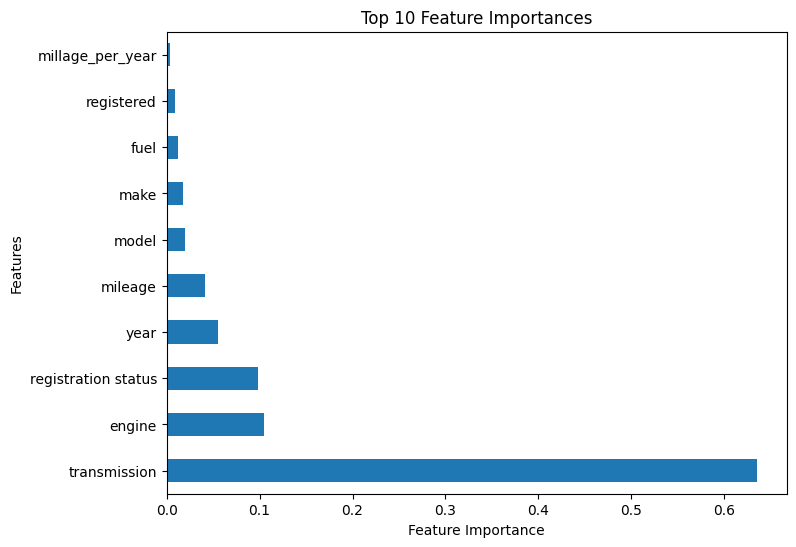

In [74]:
import matplotlib.pyplot as plt

# Feature importances plot
plt.figure(figsize=(8, 6))
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.show()

## LightGBM Regressor:

In [69]:
# Create the LightGBM Regressor model
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.01, num_leaves=31, max_depth=-1)

# Train the model on the training set
lgbm.fit(x_train, y_train)





[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1242
[LightGBM] [Info] Number of data points in the train set: 67086, number of used features: 12
[LightGBM] [Info] Start training from score 3357551.650121


LGBMRegressor(learning_rate=0.01, n_estimators=1000)

In [70]:
# Evaluate the model performance 
y_pred = lgbm.predict(x_test)


In [71]:
mse = mean_squared_error(y_test , y_pred)

In [72]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [73]:
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r_squared)

Mean Squared Error (MSE): 327717701405.3923
Root Mean Squared Error (RMSE): 572466.3321151666
Mean Absolute Error (MAE): 343551.8567874192
R-squared (R²): 0.9447115639788274


In [51]:
from sklearn.model_selection import GridSearchCV
## initialize the grid search
grid_search = GridSearchCV(lgbm,param_grid , cv = 5, n_jobs = -1) 

In [52]:
## fit he grid search cv

grid_search.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1242
[LightGBM] [Info] Number of data points in the train set: 67086, number of used features: 12
[LightGBM] [Info] Start training from score 3357551.650121


GridSearchCV(cv=5,
             estimator=LGBMRegressor(learning_rate=0.2, max_depth=7,
                                     n_estimators=200, reg_alpha=0.2,
                                     reg_lambda=0.2),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [-1, 3, 5, 7],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 63, 127, 255]})

In [53]:
## get best parameters and beset model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [54]:
## train the best model

best_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1242
[LightGBM] [Info] Number of data points in the train set: 67086, number of used features: 12
[LightGBM] [Info] Start training from score 3357551.650121


LGBMRegressor(n_estimators=200, num_leaves=127, reg_alpha=0.2, reg_lambda=0.2)

In [55]:
y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test , y_pred)

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [58]:
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r_squared)

Mean Squared Error (MSE): 239113435514.25488
Root Mean Squared Error (RMSE): 488992.2652908274
Mean Absolute Error (MAE): 277097.64916909754
R-squared (R²): 0.9596597686834162


In [59]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_pred,y_test))

0.9575604740088568


{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 127}